### Spectral embedding tests ER graph

In [1]:
%matplotlib inline
#
from lrgsglib.shared import *
from lrgsglib.config.const import *
from lrgsglib.nx_patches.funcs import signed_spectral_layout
from lrgsglib.core import move_to_rootf,ErdosRenyi
#
move_to_rootf(print_tf=True)
plt.style.use('ipynb/nb_plotsheet.mplstyle')

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [3]:
from graph_tool.draw import graph_draw


In [11]:
import graph_tool.all as gt
from graph_tool.draw import graph_draw
import numpy as np

def generate_erdos_renyi(n, p):
    # n is the number of vertices
    # p is the probability of an edge between any two vertices
    g = gt.random_graph(n, lambda: np.random.poisson(p * (n - 1)),
                        directed=False,
                        model="erdos",
                        n_iter=1)
    return g
n = 10000  # number of vertices
p = 0.1  # probability of an edge
g = generate_erdos_renyi(n, p)

# Optionally, draw the graph
# graph_draw(g, output_size=(500, 500))

In [4]:
ergraph = ErdosRenyi(pflip=0.3, n=10**4, p=0.1, init_nw_dict=False)
ergraph.flip_random_fract_edges()

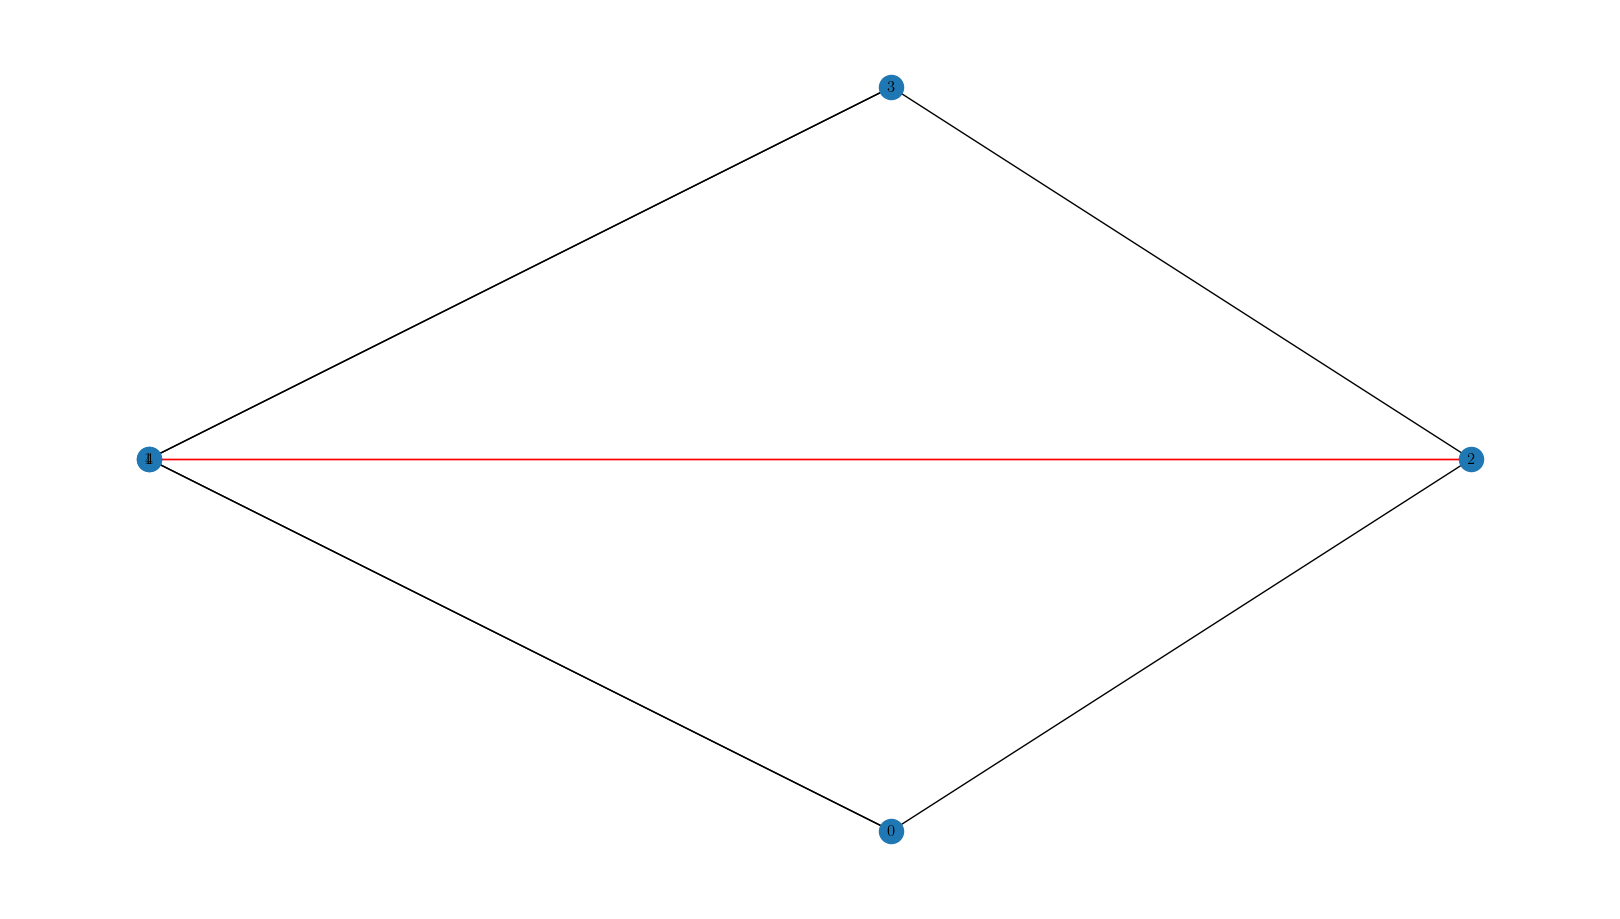

In [9]:
ergraph.G.edges(data='weight')
edge_colors = ['red' if ergraph.G[u][v]['weight'] < 0 else 'black' for u, v in ergraph.G.edges()]
pos = signed_spectral_layout(ergraph.G)
nx.draw(ergraph.G, edge_color=edge_colors, pos=pos, labels={i: i for i in range(nx.number_of_nodes(ergraph.G))})

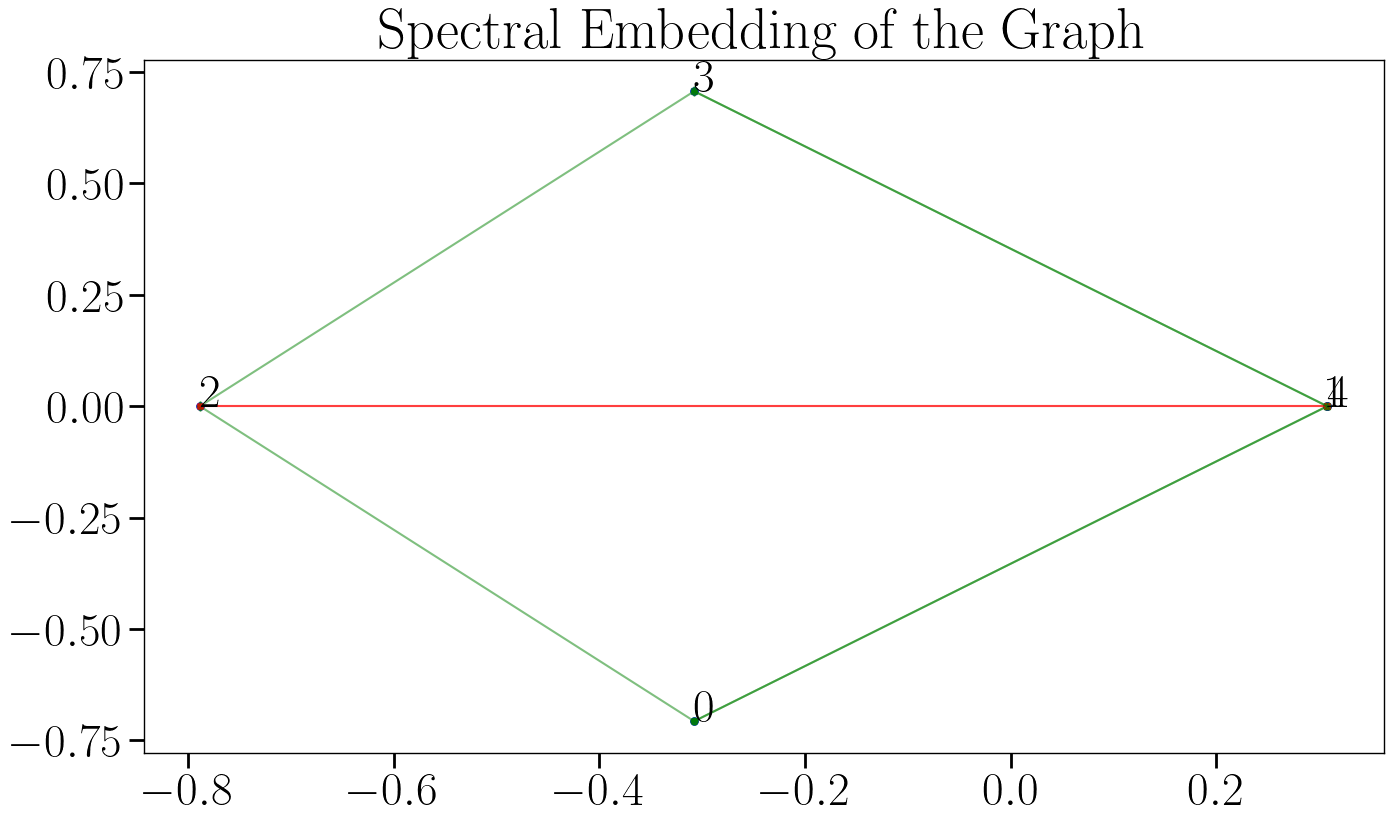

In [10]:
ergraph.compute_k_eigvV(howmany=3)
# Step 3: Perform eigendecomposition
ergraph.eigV.T
# Step 4: Select eigenvectors for embedding (e.g., 2nd and 3rd smallest)
# Skipping the first eigenvector (corresponding to the smallest eigenvalue)
embedding = ergraph.eigV.T[:, 1:3]


def choose_color(weight):
    return 'red' if weight < 0 else 'green'
# # Step 5: Plot the embedding
plt.scatter(embedding[:, 0], embedding[:, 1])
for i, txt in enumerate(ergraph.G.nodes()):
    plt.annotate(txt, (embedding[i, 0], embedding[i, 1]))

# Draw edges
for edge in ergraph.G.edges():
    x0, y0 = embedding[edge[0]]
    x1, y1 = embedding[edge[1]]
    color = choose_color(ergraph.G.edges[edge]['weight'])
    plt.plot([x0, x1], [y0, y1], color=color, alpha=0.5)  # Draw line for each edge

# Draw nodes
plt.scatter(embedding[:, 0], embedding[:, 1], c='blue')
plt.title("Spectral Embedding of the Graph")
plt.show()